In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_pickle("embeddings2.pkl")
df = df.dropna()
embeddings = df["desc_vectors_comb"].to_numpy()

In [22]:
embeddings = pd.DataFrame(embeddings.tolist()).to_numpy()

In [31]:
from sklearn.cluster import MiniBatchKMeans
kmeans_list = []
K = range(1,10)
ssd = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k, batch_size = 1024).fit(embeddings.reshape((-1,1)))
    print(k)
    ssd.append(kmeans.inertia_)




1
2
3
4
5
6
7
8
9


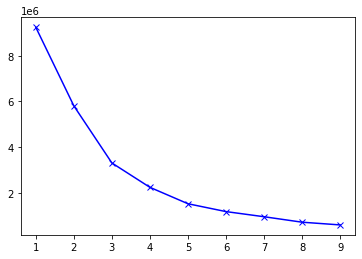

In [32]:
plt.plot(K,ssd, "bx-")

In [54]:
kmeans = MiniBatchKMeans(n_clusters = 8, batch_size = 1024)
kmeans.fit(embeddings)

MiniBatchKMeans(batch_size=1024)

In [56]:
predict = kmeans.predict(embeddings)

In [40]:
ssd

[9245676.56716144,
 5803228.147768974,
 3301381.789873481,
 2233704.474298477,
 1515228.1529561281,
 1171466.0521091223,
 946307.8935992718,
 707002.3167787194,
 588169.8905371428]

In [57]:
predict.shape

(308156,)

In [78]:
plot = pd.DataFrame(df["desc_vectors_comb"].tolist())
plot["Cluster"] = predict
plot["purpose"] = df["purpose"]
sample = pd.DataFrame(plot.sample(5000).to_numpy())


In [79]:
sample.columns = plot.columns

In [80]:
from sklearn.decomposition import PCA

pca_1d = PCA(n_components = 1)
pca_2d = PCA(n_components = 2)
pca_3d = PCA(n_components = 3)

In [82]:
PC_1d = pd.DataFrame(pca_1d.fit_transform(sample.drop(["Cluster","purpose"], axis=1)))
PC_2d = pd.DataFrame(pca_2d.fit_transform(sample.drop(["Cluster","purpose"], axis=1)))
PC_3d = pd.DataFrame(pca_3d.fit_transform(sample.drop(["Cluster","purpose"], axis=1)))


In [83]:
set(predict)

{0, 1, 2, 3, 4, 5, 6, 7}

In [84]:
PC_1d.columns = ["PC1_1d"]
PC_2d.columns = ["PC1_2d", "PC2_2d"]
PC_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [85]:
plotX = pd.concat([sample,PC_1d,PC_2d,PC_3d], axis=1, join='inner')


In [99]:
plotX["dummy"] = 0
plotX = plotX.dropna()

,0,1,2,3,4,5,6,7,8,9,...,299,Cluster,purpose,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d,dummy


In [105]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]
cluster4 = plotX[plotX["Cluster"] == 4]
cluster5 = plotX[plotX["Cluster"] == 5]
cluster6 = plotX[plotX["Cluster"] == 6]
cluster7 = plotX[plotX["Cluster"] == 7]


In [88]:
fig = go.Figure()
names = ["Cluster" + str(x) for x in set(predict)]
clusters = [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7]
for cluster, name in zip(clusters,names):
    fig.add_trace(go.Scatter(
                        x = cluster["PC1_1d"],
                        y = cluster["dummy"],
                        mode = "markers",
                        name = name,
                        text = None))
fig.show()

In [89]:
fig = go.Figure()
names = ["Cluster" + str(x) for x in set(predict)]
clusters = [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7]
for cluster, name in zip(clusters,names):
    fig.add_trace(go.Scatter(
                        x = cluster["PC1_2d"],
                        y = cluster["PC2_2d"],
                        mode = "markers",
                        name = name,
                        text = None))
fig.show()

In [ ]:
fig = go.Figure()
names = ["Cluster" + str(x) for x in set(predict)]
clusters = [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7]
for cluster, name in zip(clusters,names):
    fig.add_trace(go.Scatter(
                        x = cluster["PC1_2d"],
                        y = cluster["PC2_2d"],
                        mode = "markers",
                        name = name,
                        text = None))
fig.show()

In [110]:
fig0 = go.Figure()
purposes = plotX["purpose"].unique()
for purp in purposes:
    cluster_purp = cluster0[cluster0["purpose"] == purp]
    fig0.add_trace(go.Scatter(
                    x = cluster_purp["PC1_2d"],
                    y = cluster_purp["PC2_2d"],
                    mode = "markers",
                    name = purp,
                    text = None))
fig0.show()

In [112]:
fig1 = go.Figure()
purposes = plotX["purpose"].unique()
for purp in purposes:
    cluster_purp = cluster1[cluster1["purpose"] == purp]
    fig1.add_trace(go.Scatter(
                    x = cluster_purp["PC1_2d"],
                    y = cluster_purp["PC2_2d"],
                    mode = "markers",
                    name = purp,
                    text = None))
fig1.show()

In [102]:
plotX["purpose"].unique()

array(['medical', 'debt_consolidation', 'credit_card', 'car', 'house',
       'major_purchase', 'small_business', 'wedding', 'moving',
       'educational', 'vacation'], dtype=object)

In [108]:
cluster0[cluster0["purpose"] == purp]

,0,1,2,3,4,5,6,7,8,9,...,299,Cluster,purpose,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d,dummy
349,-0.118616,-0.370082,-0.134328,-0.07843,-0.057273,-0.397849,-0.149865,-0.840646,0.37844,-0.043693,...,-0.011165,0,vacation,0.140581,0.140581,0.270630,0.140581,0.270630,0.342240,0
880,0.012698,-0.203759,0.082895,-0.018153,0.092374,-0.292423,-0.216711,-0.978517,0.37444,0.002284,...,-0.103381,0,vacation,0.839921,0.839921,0.765099,0.839921,0.765100,0.820309,0
2790,-0.1051,-0.130723,-0.090336,0.194839,0.047092,0.159695,-0.061197,-0.720688,-0.065505,-0.009454,...,-0.160189,0,vacation,-0.101057,-0.101057,1.423251,-0.101057,1.423251,-0.473280,0
4439,-0.034212,0.047484,-0.044452,-0.004676,0.06195,0.025978,-0.058261,-0.662965,-0.106685,-0.094123,...,-0.129878,0,vacation,-0.982564,-0.982564,0.931082,-0.982564,0.931082,0.230590,0


In [101]:

1
​

,purpose,desc_vectors_comb
0,credit_card,"[-0.0703089, 0.002032604, -0.0399277, -0.06078..."
1,car,"[0.1988884, 0.147514, -0.03442761, 0.18677361,..."
2,car,"[0.314511, -0.024471298, -0.10646101, 0.075561..."
3,car,"[0.103431895, 0.1384333, 0.029456109, -0.07859..."
4,car,"[-0.14892301, 0.014138006, 0.008705998, -0.121..."
...,...,...
314326,debt_consolidation,"[-0.180831, -0.16670649, -0.19872122, -0.20416..."
314327,debt_consolidation,"[0.0102775, -0.26204902, 0.13135031, 0.1359116..."
314328,debt_consolidation,"[0.058400597, -0.318913, 0.1849146, -0.0737343..."
314329,debt_consolidation,"[0.2757701, -0.2454794, -0.076299, -0.0105355,..."


In [136]:
cluster_group = plotX.groupby("Cluster")["purpose"].value_counts()

In [145]:
cluster_group[7]

purpose
debt_consolidation    385
credit_card           157
house                  49
small_business         21
major_purchase         15
car                    14
wedding                 7
medical                 5
vacation                5
moving                  3
Name: purpose, dtype: int64

In [147]:
plotX

,0,1,2,3,4,5,6,7,8,9,...,299,Cluster,purpose,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d,dummy
0,0.109024,-0.089675,0.016915,-0.207005,-0.078575,-0.344763,-0.09944,-1.341879,0.196871,-0.014794,...,-0.249242,3,medical,2.830406,2.830406,0.385260,2.830406,0.385261,-0.151803,0
1,0.040475,-0.092245,-0.060185,0.033635,-0.012819,-0.05031,-0.007655,-0.160324,0.09508,-0.030475,...,0.040572,2,debt_consolidation,-3.074614,-3.074614,-0.651609,-3.074614,-0.651609,0.144710,0
2,0.119482,0.013379,-0.109811,-0.141065,0.047591,0.037556,0.004163,-0.370403,0.028708,-0.027477,...,-0.011533,2,debt_consolidation,-2.072912,-2.072912,0.341602,-2.072912,0.341602,-0.395865,0
3,-0.080708,-0.085525,0.165004,-0.190279,-0.018346,-0.047918,0.056359,-1.042322,-0.320345,-0.070636,...,-0.292276,3,debt_consolidation,1.703590,1.703590,0.529320,1.703590,0.529321,-1.192707,0
4,0.057789,-0.282009,-0.18876,-0.108273,-0.0479,-0.304294,-0.029594,-0.959115,0.03122,-0.037246,...,-0.300842,7,credit_card,1.262169,1.262169,-1.460968,1.262169,-1.460969,-0.233237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.028242,-0.031818,-0.000353,0.044615,-0.043652,0.007989,-0.049893,-0.098807,-0.017264,-0.005825,...,-0.005286,2,debt_consolidation,-3.733866,-3.733866,0.035601,-3.733866,0.035601,0.111114,0
4996,0.019237,-0.269872,0.097674,-0.085998,-0.098009,-0.046124,-0.017381,-0.522288,-0.038464,0.015444,...,-0.073528,2,debt_consolidation,-1.630304,-1.630304,0.220191,-1.630304,0.220191,-0.092118,0
4997,0.229628,-0.083613,-0.035689,0.068403,0.002159,-0.153172,-0.354197,-1.170765,0.55206,-0.151258,...,-0.208227,7,debt_consolidation,1.925013,1.925013,-0.506825,1.925013,-0.506825,0.275726,0
4998,-0.147531,0.158348,-0.02063,0.030261,0.298585,-0.259062,-0.08374,-0.69279,-0.013157,-0.289976,...,-0.027232,0,debt_consolidation,-0.856860,-0.856860,1.208958,-0.856860,1.208958,-0.011173,0
